In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# Initializing mediapipe pose class
mp_pose = mp.solutions.pose

# Setting up the Pose function
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation
mp_drawing = mp.solutions.drawing_utils

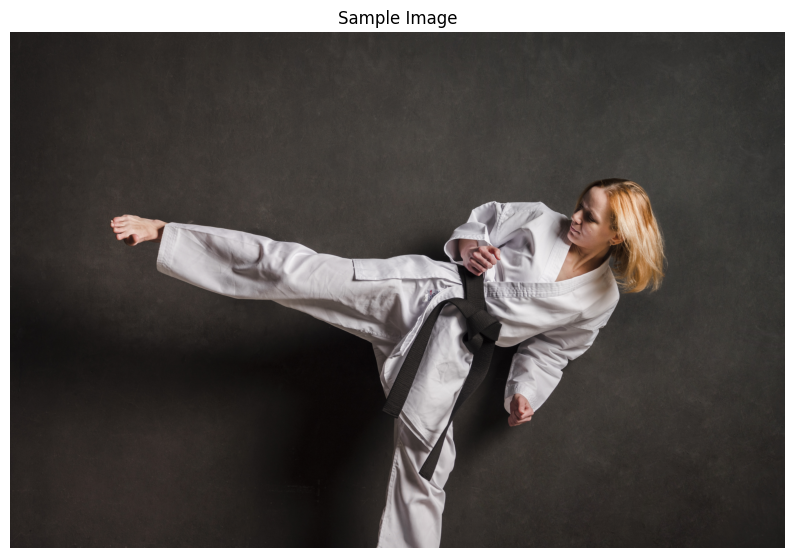

In [3]:
# Read an image from the specified path.
sample_img = cv2.imread('media/sample.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [4]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

d:\Miniconda\envs\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [5]:
# Check if any landmarks are found.
if results.pose_landmarks:
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.733866751
y: 0.362018883
z: -0.199154511
visibility: 0.999908805

LEFT_EYE_INNER:
x: 0.748561
y: 0.356177688
z: -0.195991695
visibility: 0.999637485



In [6]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 4213.129018604755
y: 1382.9121339321136
z: -1143.3460481911898
visibility: 0.9999088048934937

LEFT_EYE_INNER:
x: 4297.4888426065445
y: 1360.5987668037415
z: -1125.1883205771446
visibility: 0.9996374845504761



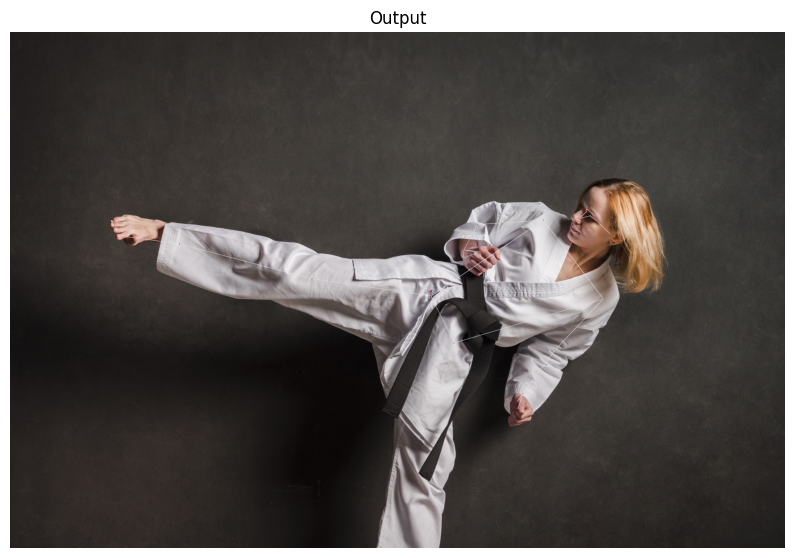

In [7]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

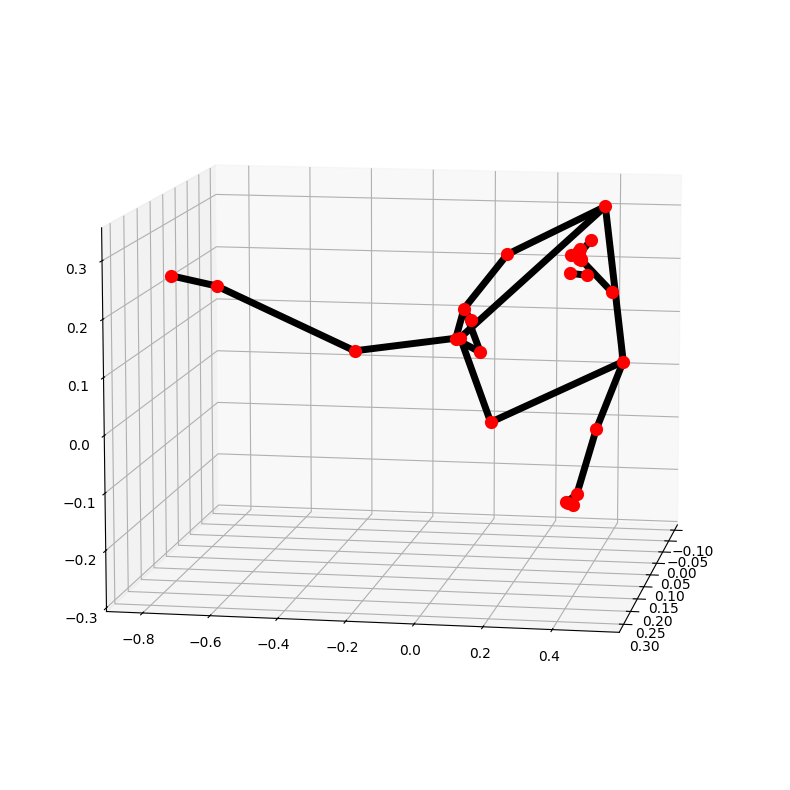

In [8]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [9]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        # Return the output image and the found landmarks.
        return output_image, landmarks

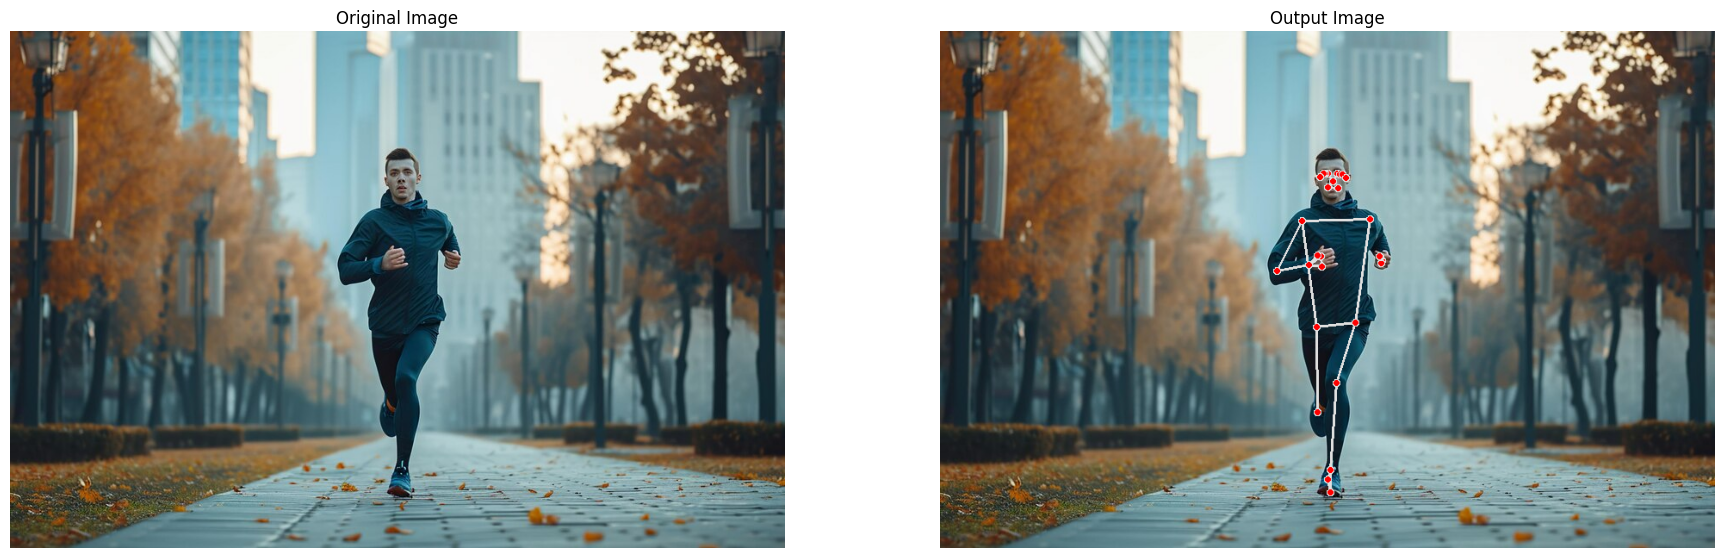

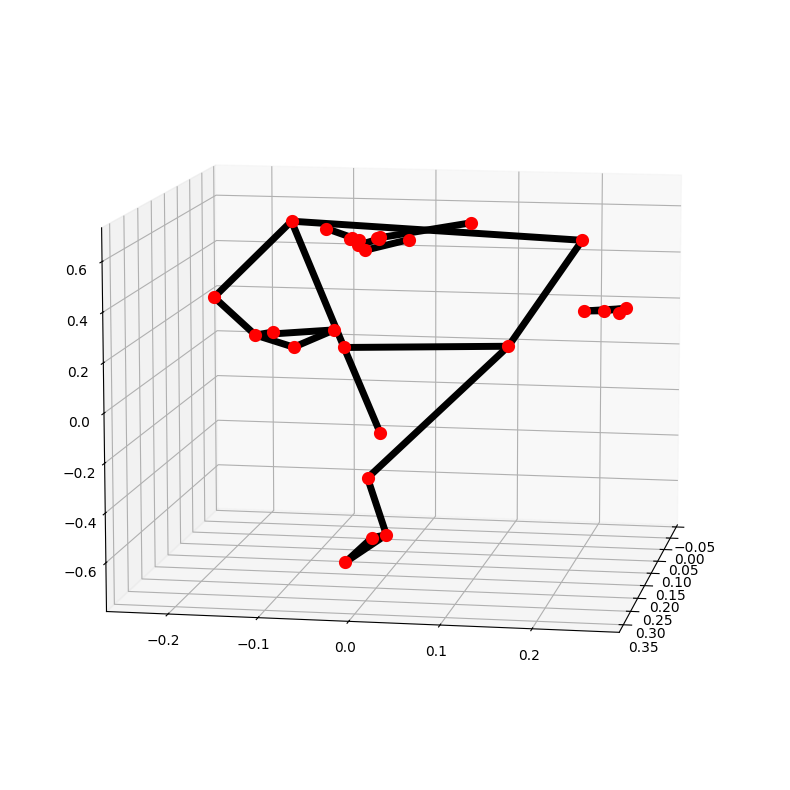

In [10]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('media/sample1.jpg')
detectPose(image, pose, display=True)

In [11]:
import cv2
import mediapipe as mp
from time import time

# Setup Pose function for video.
mp_pose = mp.solutions.pose
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
video = cv2.VideoCapture(0)  # Try changing to 0, 1, or other indices

# Check if the camera opened successfully
if not video.isOpened():
    print("Error: Could not open video.")
    exit()

# Create named window for resizing purposes
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

# Set video camera size
video.set(3, 1280)
video.set(4, 960)

# Initialize a variable to store the time of the previous frame.
time1 = 0

def detectPose(frame, pose_video, display=True):
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose_video.process(image_rgb)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    return frame, results.pose_landmarks

# Iterate until the video is accessed successfully.
while video.isOpened():
    # Read a frame.
    ok, frame = video.read()
    
    # Check if frame is not read properly.
    if not ok:
        print("Error: Cannot read frame.")
        break
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ = frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)
    
    # Wait until a key is pressed.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if k == 27:
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
cv2.destroyAllWindows()


In [12]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.
    '''
    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points.
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:
        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [13]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

mp_pose = mp.solutions.pose

def calculateAngle(a, b, c):
    """
    Calculate the angle between three points
    :param a: First point
    :param b: Middle point
    :param c: Last point
    :return: Angle in degrees
    """
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360.0 - angle

    return angle

def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A NormalizedLandmarkList object containing detected landmarks of the person whose pose needs to be classified.
        output_image: An image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.
    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Check if any landmarks are detected.
    if landmarks:
        # Convert NormalizedLandmarkList object to list
        landmark_list = [lmk for lmk in landmarks.landmark]
        
        # Calculate the required angles.
        # Get the angle between the left shoulder, elbow, and wrist points. 
        left_elbow_angle = calculateAngle(
            (landmark_list[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.LEFT_ELBOW.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_ELBOW.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_ELBOW.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.LEFT_WRIST.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_WRIST.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_WRIST.value].z * output_image.shape[1])
        )

        # Get the angle between the right shoulder, elbow, and wrist points. 
        right_elbow_angle = calculateAngle(
            (landmark_list[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.RIGHT_WRIST.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_WRIST.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_WRIST.value].z * output_image.shape[1])
        )

        # Get the angle between the left elbow, shoulder, and hip points. 
        left_shoulder_angle = calculateAngle(
            (landmark_list[mp_pose.PoseLandmark.LEFT_ELBOW.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_ELBOW.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_ELBOW.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.LEFT_HIP.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_HIP.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_HIP.value].z * output_image.shape[1])
        )

        # Get the angle between the right hip, shoulder, and elbow points. 
        right_shoulder_angle = calculateAngle(
            (landmark_list[mp_pose.PoseLandmark.RIGHT_HIP.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_HIP.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_HIP.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z * output_image.shape[1])
        )

        # Get the angle between the left hip, knee, and ankle points. 
        left_knee_angle = calculateAngle(
            (landmark_list[mp_pose.PoseLandmark.LEFT_HIP.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_HIP.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_HIP.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.LEFT_KNEE.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_KNEE.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_KNEE.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.LEFT_ANKLE.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.LEFT_ANKLE.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.LEFT_ANKLE.value].z * output_image.shape[1])
        )

        # Get the angle between the right hip, knee, and ankle points. 
        right_knee_angle = calculateAngle(
            (landmark_list[mp_pose.PoseLandmark.RIGHT_HIP.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_HIP.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_HIP.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.RIGHT_KNEE.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_KNEE.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_KNEE.value].z * output_image.shape[1]),

            (landmark_list[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x * output_image.shape[1],
             landmark_list[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y * output_image.shape[0], 
             landmark_list[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z * output_image.shape[1])
        )

        # Classify the pose based on the calculated angles.
        # T Pose
        if (left_elbow_angle > 160 and right_elbow_angle > 160 and 
            80 < left_shoulder_angle < 100 and 80 < right_shoulder_angle < 100):
            label = 'T Pose'
        # Warrior II Pose
        elif (left_elbow_angle > 150 and right_elbow_angle > 150 and 
              left_knee_angle > 160 and right_knee_angle > 160):
            label = 'Warrior II Pose'
        # Tree Pose
        elif (left_elbow_angle > 150 and right_elbow_angle > 150 and 
              (left_knee_angle < 120 or right_knee_angle < 120)):
            label = 'Tree Pose'

        # Write the classified pose label on the image.
        cv2.putText(output_image, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

        # Check if the output image is specified to be displayed.
        if display:
            # Display the output image.
            plt.figure(figsize=[10,10])
            plt.imshow(output_image[:,:,::-1])
            plt.title("Output Image")
            plt.axis('off')
            plt.show()

    # Return the output image and the classified pose label.
    return output_image, label


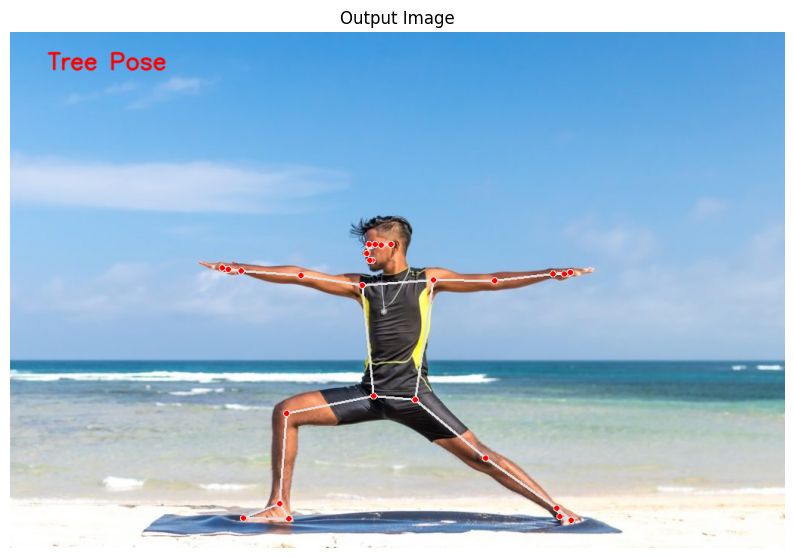

In [15]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('media/warriorIIpose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

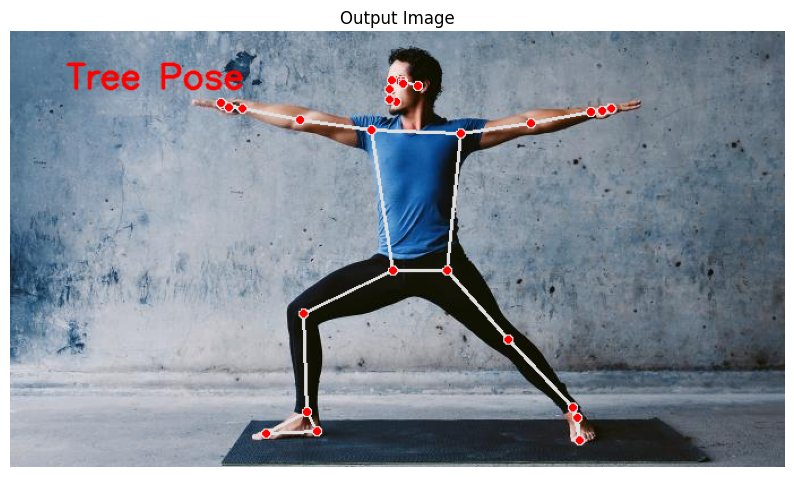

In [16]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('media/warriorIIpose1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

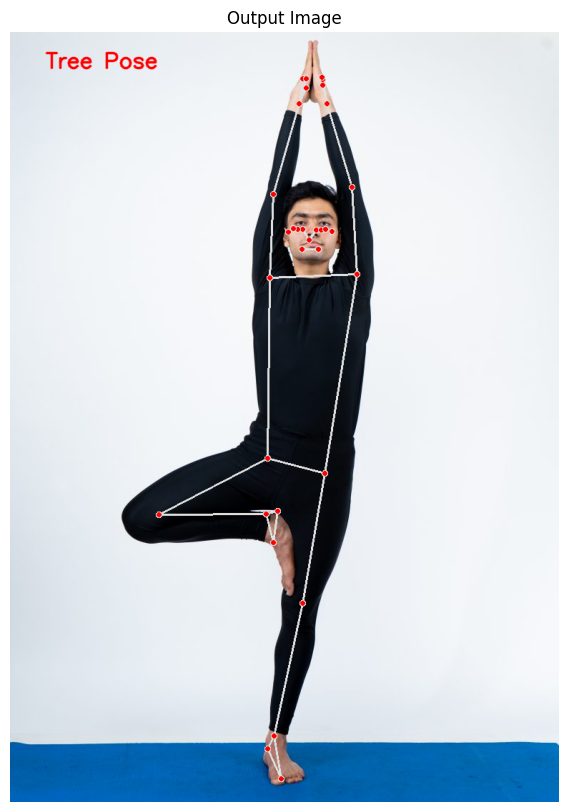

In [17]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('media/treepose.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

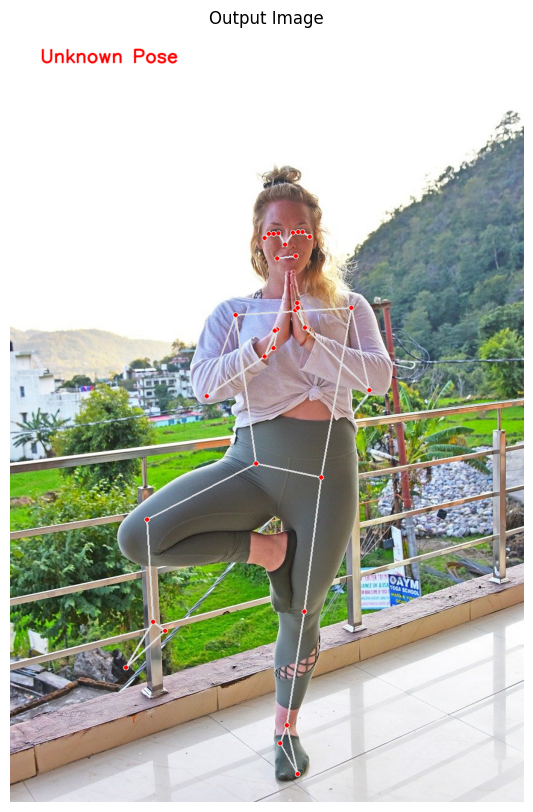

In [18]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('media/treepose1.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

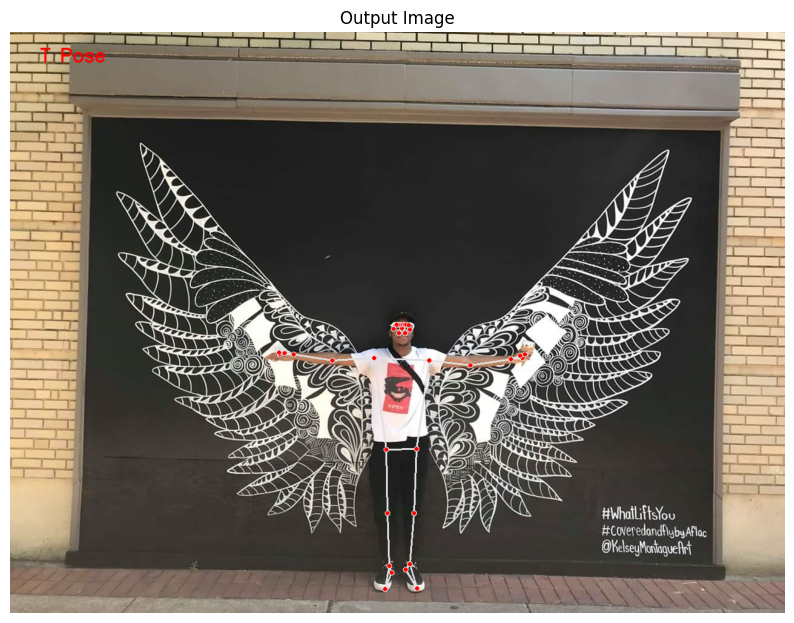

In [19]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('media/Tpose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

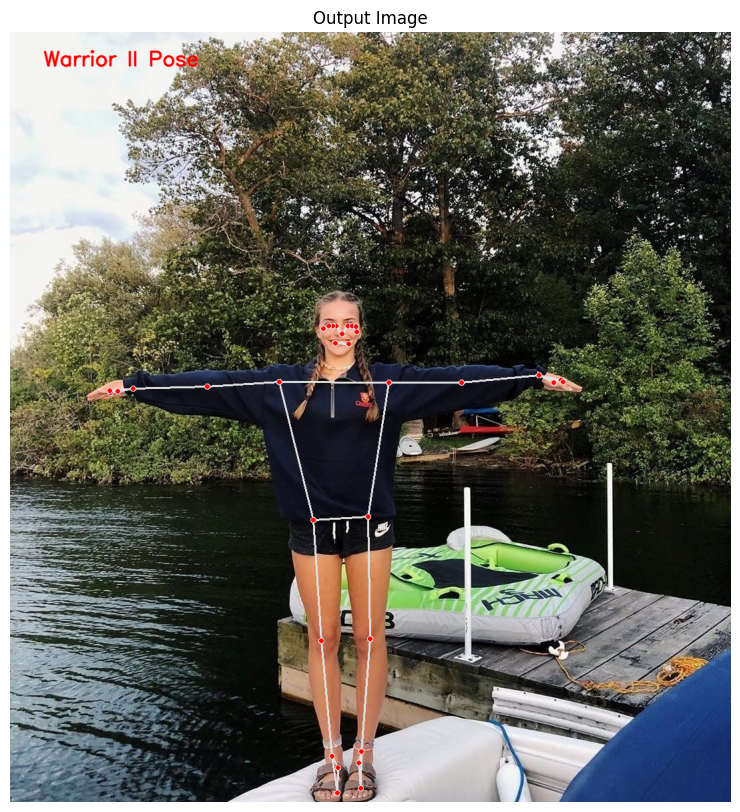

In [20]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('media/Tpose1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [21]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()